# Plant Disease Prediction

## Importing libraries

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [9]:
data_dir = "../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
train_dir = data_dir + "/train"
valid_dir = data_dir + "/valid"

# Load the training dataset using the correct train_dir
training_set = tf.keras.utils.image_dataset_from_directory(
    train_dir,  # Use the correct path to the train directory
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [10]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_dir,  # Use the correct path to the valid directory
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [13]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2)) 

In [15]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [16]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [17]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [18]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [19]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [20]:
cnn.add(tf.keras.layers.Flatten())

In [21]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [22]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [23]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

### Compiling and Training Phase

In [25]:
# Compile the CNN model with the regular Adam optimizer
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])


In [26]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
#training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

In [28]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=20)

Epoch 1/20


I0000 00:00:1726920384.821299     115 service.cc:145] XLA service 0x7eeabc0040e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726920384.821391     115 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


   5/2197 ━━━━━━━━━━━━━━━━━━━━ 1:04 30ms/step - accuracy: 0.0372 - loss: 4.0069 

I0000 00:00:1726920393.783340     115 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_5', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_4', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_3', 4 bytes spill stores, 12 bytes spill loads

I0000 00:00:1726920393.793502     115 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.4074 - loss: 2.0807

I0000 00:00:1726920506.023587     118 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_5', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_4', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_3', 4 bytes spill stores, 12 bytes spill loads



2197/2197 ━━━━━━━━━━━━━━━━━━━━ 155s 65ms/step - accuracy: 0.4075 - loss: 2.0804 - val_accuracy: 0.8569 - val_loss: 0.4546
Epoch 2/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 65s 30ms/step - accuracy: 0.8489 - loss: 0.4848 - val_accuracy: 0.9075 - val_loss: 0.2867
Epoch 3/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 66s 30ms/step - accuracy: 0.9121 - loss: 0.2707 - val_accuracy: 0.9315 - val_loss: 0.2069
Epoch 4/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 67s 30ms/step - accuracy: 0.9398 - loss: 0.1876 - val_accuracy: 0.9446 - val_loss: 0.1673
Epoch 5/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 67s 30ms/step - accuracy: 0.9568 - loss: 0.1351 - val_accuracy: 0.9361 - val_loss: 0.2113
Epoch 6/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 65s 29ms/step - accuracy: 0.9629 - loss: 0.1125 - val_accuracy: 0.9491 - val_loss: 0.1628
Epoch 7/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 65s 29ms/step - accuracy: 0.9706 - loss: 0.0900 - val_accuracy: 0.9550 - val_loss: 0.1507
Epoch 8/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 65s 30ms/step - accuracy: 0.9767 - loss: 0.0

## Evaluating Model

In [29]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 31s 14ms/step - accuracy: 0.9865 - loss: 0.0480
Training accuracy: 0.986997663974762


In [30]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9607 - loss: 0.1722
Validation accuracy: 0.960050106048584


### Saving Model

In [31]:
cnn.save('trained_plant_disease_model.keras')

In [32]:
training_history.history #Return Dictionary of history

{'accuracy': [0.6104132533073425,
  0.8663489818572998,
  0.9184863567352295,
  0.9424852132797241,
  0.9574365019798279,
  0.9652749300003052,
  0.9719467759132385,
  0.9773098826408386,
  0.9803826808929443,
  0.9821608662605286,
  0.9842662811279297,
  0.9866989254951477,
  0.9867557883262634,
  0.9894444942474365,
  0.9883348941802979,
  0.9898712635040283,
  0.9898996949195862,
  0.9913792014122009,
  0.9913222789764404,
  0.9920762777328491],
 'loss': [1.3127474784851074,
  0.4230034649372101,
  0.25152596831321716,
  0.17753709852695465,
  0.13090308010578156,
  0.10563255846500397,
  0.08566628396511078,
  0.06927479803562164,
  0.06192031502723694,
  0.055822521448135376,
  0.04910916090011597,
  0.04122677817940712,
  0.042409349232912064,
  0.034596845507621765,
  0.03658999502658844,
  0.03456943482160568,
  0.03244340792298317,
  0.02759583853185177,
  0.02923978865146637,
  0.025895684957504272],
 'val_accuracy': [0.8569315075874329,
  0.9075233340263367,
  0.931538820266

In [33]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [34]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Visualization

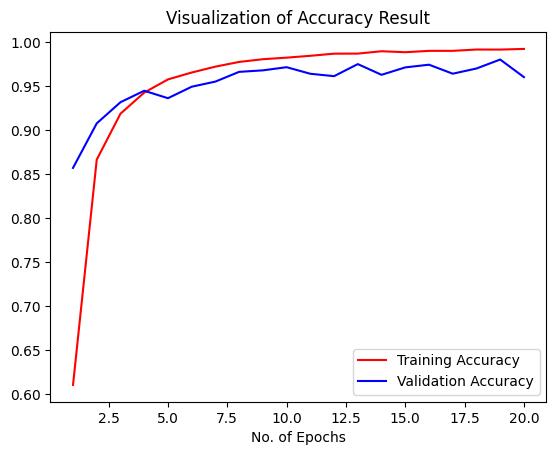

In [35]:
epochs = [i for i in range(1,21)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [36]:
class_name = validation_set.class_names

In [37]:
test_set = tf.keras.utils.image_dataset_from_directory(
    valid_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [38]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step


In [39]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [40]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [41]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [42]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [43]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.89      0.99      0.94       504
                                 Apple___Black_rot       1.00      0.93      0.96       497
                          Apple___Cedar_apple_rust       0.98      0.99      0.98       440
                                   Apple___healthy       0.99      0.89      0.94       502
                               Blueberry___healthy       0.97      0.97      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.99      0.98       421
                 Cherry_(including_sour)___healthy       1.00      0.88      0.93       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.89      0.92       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.91      0.97      0.

### Confusion Matrix Visualization

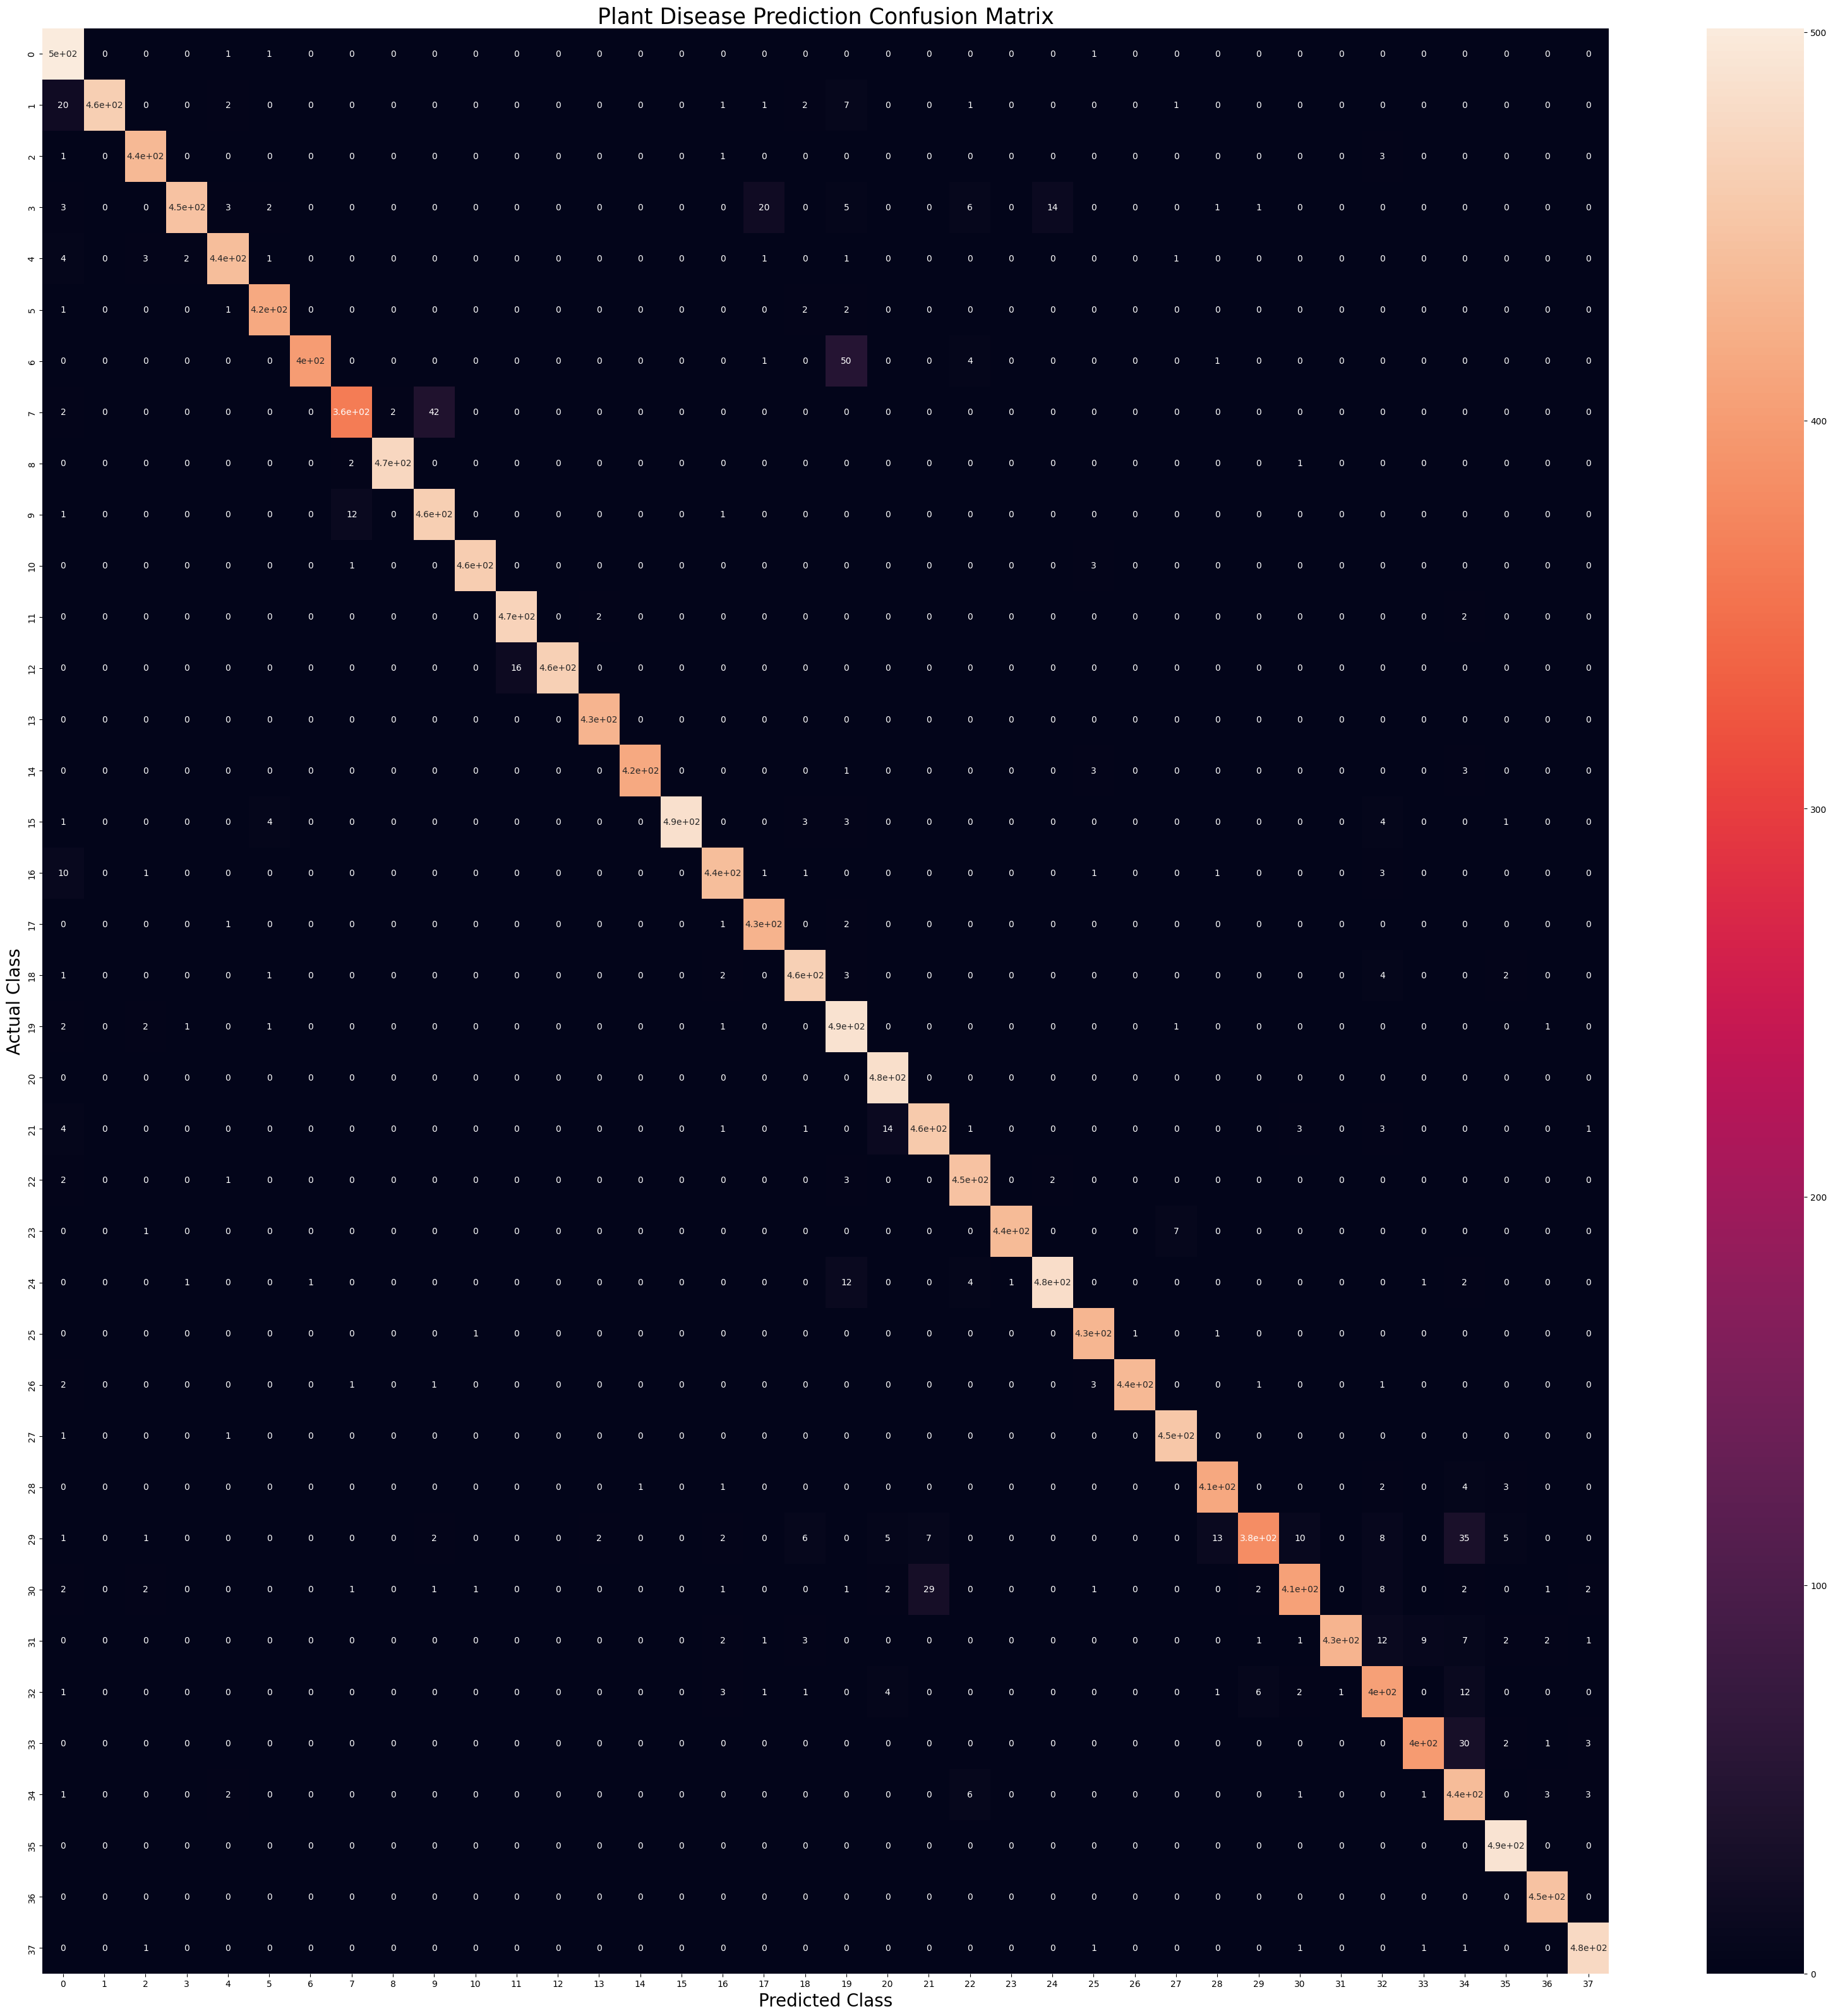

In [44]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

 # **Test_Plant_Disease**

In [45]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Updated import
import matplotlib.pyplot as plt


In [46]:
data_dir = "../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
train_dir = data_dir + "/train"
valid_dir = data_dir + "/valid"

In [47]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [50]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

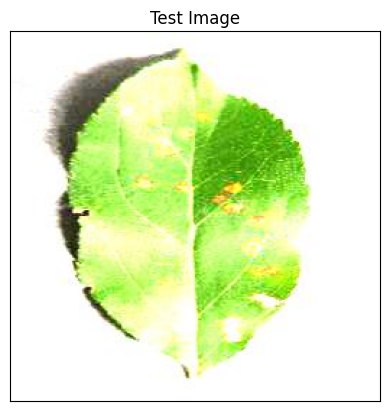

In [52]:
#Test Image Visualization
import cv2
image_path = '/kaggle/input/new-plant-diseases-dataset/test/test/AppleCedarRust1.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [53]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


In [54]:
print(predictions)

[[4.15001619e-20 5.91382720e-17 1.00000000e+00 3.01161732e-24
  7.83114121e-17 1.92116491e-14 1.38853546e-25 5.98681258e-21
  8.08653225e-27 5.25487120e-25 8.18180215e-32 2.30308569e-18
  4.32781381e-20 1.53122950e-23 7.80825023e-20 3.35828311e-22
  8.59393937e-17 4.38859888e-18 2.82990763e-17 1.02196916e-17
  3.03935409e-22 3.29739594e-25 1.53931890e-21 2.12776354e-19
  4.86266927e-25 1.52706935e-24 4.35390635e-22 3.10162816e-23
  1.45464684e-12 3.40606705e-17 4.81953330e-16 3.65849448e-20
  3.98237093e-16 1.02672495e-24 3.03219960e-13 5.31716065e-17
  9.48475863e-17 2.06994545e-18]]


In [55]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

2


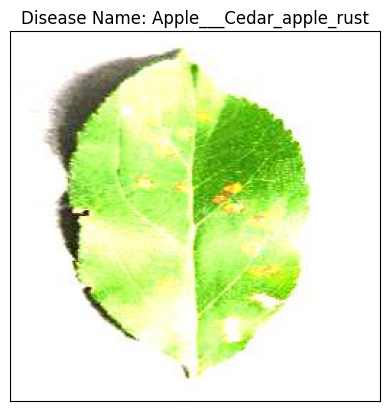

In [56]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()